In [ ]:
from spatial_classification_inference import SpatialTextInference
classifier = SpatialTextInference('spatial_classifier_model')

text = "Where is the cat?"
label, confidence, probabilities = classifier.predict_single(text)
print(f"Prediction: {label} (confidence: {confidence:.3f})")

In [ ]:
GQA_path = "/root/kl/unsloth_vlm/kl_label_600_TO_and_RO.csv"
non_spatial = "./non_spatial_500_questions.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(GQA_path)

no_count = 0
yes_count = 0

for i in range(len(df)):
    # print(df["questions"][i])
    label, confidence, probabilities = classifier.predict_single(df["questions"][i])
    if label == "Spatial":
        yes_count += 1
    else:
        no_count += 1

print(f"yes: {yes_count}, no: {no_count}")


In [ ]:
import pandas as pd
df = pd.read_csv(non_spatial)

no_count = 0
yes_count = 0

for i in range(len(df)):
    label, confidence, probabilities = classifier.predict_single(df["Question"][i])
    if label == "Spatial":
        yes_count += 1
    else:
        no_count += 1

print(f"yes: {yes_count}, no: {no_count}")

In [ ]:
spatial_classification_dataset = "./spatial_classification_dataset.csv"
df = pd.read_csv(spatial_classification_dataset)

no_count = 0
yes_count = 0

for i in range(len(df)):
    label, confidence, probabilities = classifier.predict_single(df["text"][i])
    if label == "Spatial" and df["label"][i] == 1:
        yes_count += 1
    else:
        no_count += 1

print(f"yes: {yes_count}, no: {no_count}")

In [ ]:
import pandas as pd
df = pd.read_csv("./train_set.csv")

no_count = 0
yes_count = 0

for i in range(len(df)):
    # print(df["questions"][i])
    label, confidence, probabilities = classifier.predict_single(df["text"][i])
    if label == "Spatial":
        yes_count += 1
    else:
        no_count += 1

print(f"yes: {yes_count}, no: {no_count}")


Loading pre-trained model for PCA analysis...
Using device: cuda
Model: distilbert-base-uncased
Model loaded from spatial_classifier_model
Dataset shape: (2000, 2)
Label distribution:
label
0    1000
1    1000
Name: count, dtype: int64

PCA ANALYSIS ON PRE-TRAINED MODEL
Extracting embeddings...


Extracting embeddings: 100%|██████████| 25/25 [00:00<00:00, 58.56it/s]


Original embedding shape: (400, 768)
Fitting PCA with 50 components...
First 10 components explain 0.645 of variance
Total variance explained by 50 components: 0.958
PCA embedding shape: (400, 50)


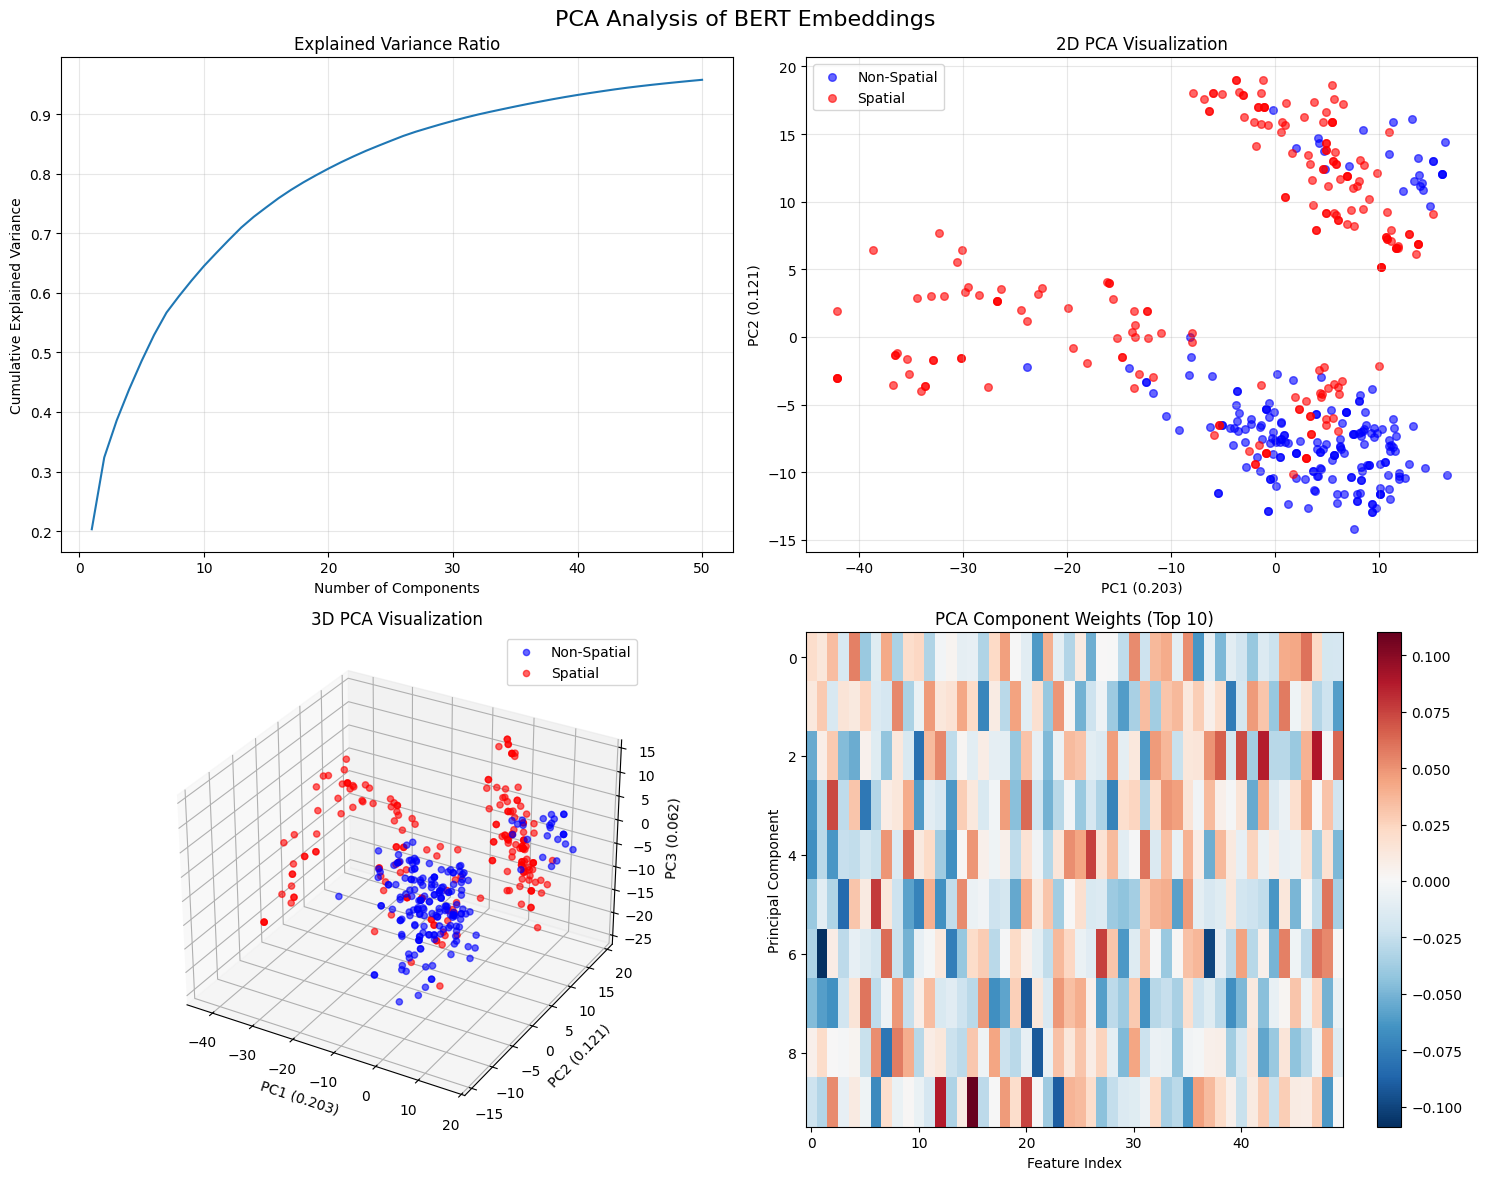

Clustering Analysis (K=2):
Adjusted Rand Index: 0.150
Silhouette Score: 0.126


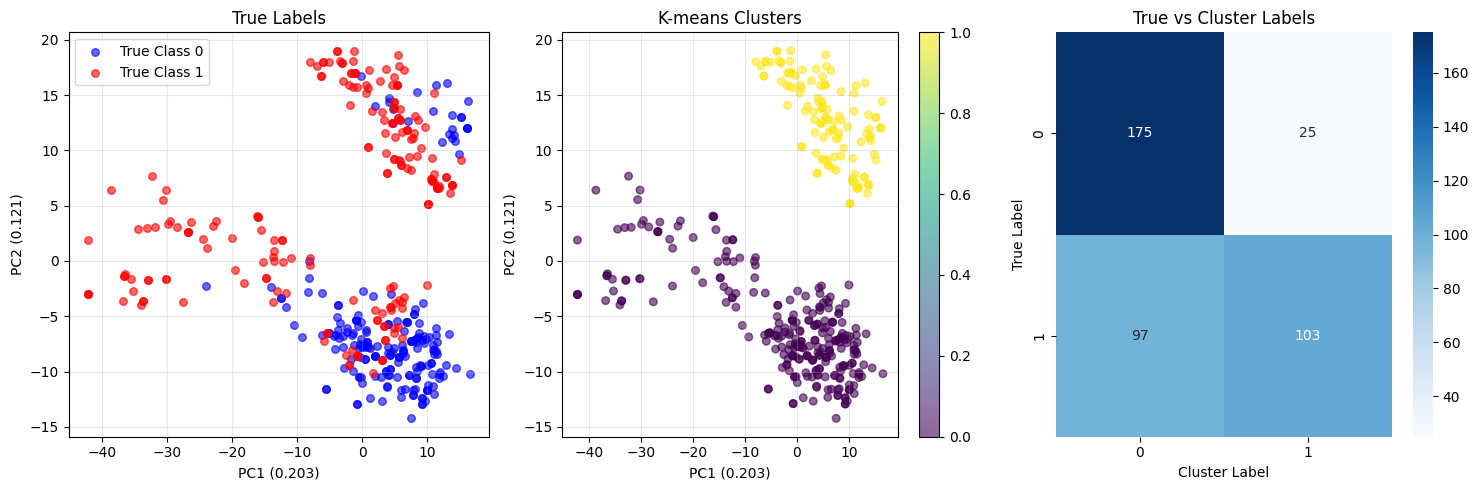

Extracting embeddings: 100%|██████████| 25/25 [00:00<00:00, 74.22it/s]


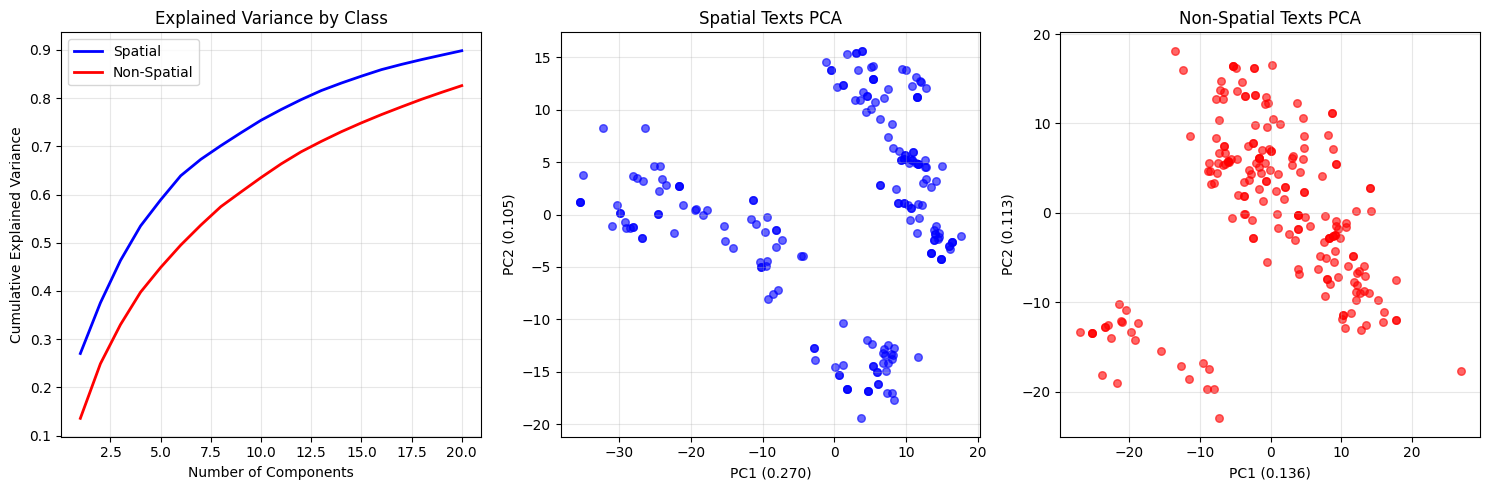

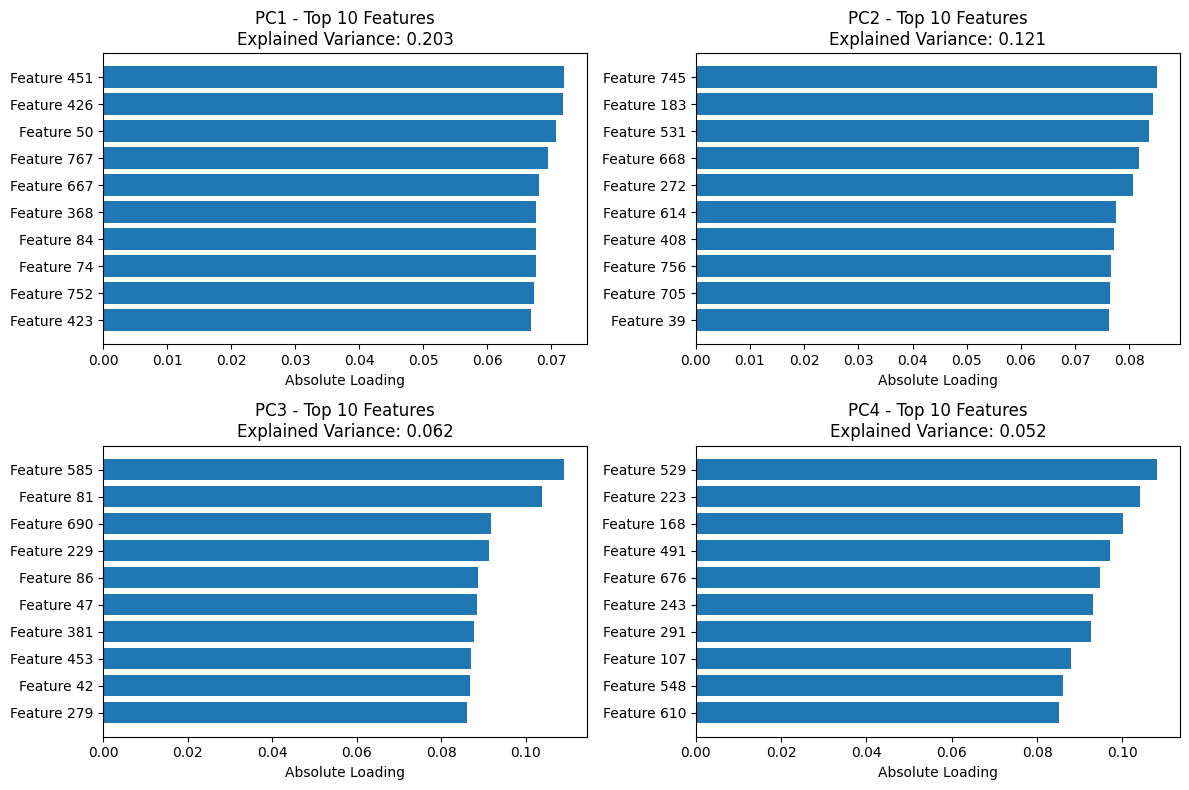

In [1]:
from PCA import analyze_pca_only
classifier = analyze_pca_only(
    model_path='spatial_classifier_model',
    data_path='./spatial_classification_dataset.csv' 
)

Extracting linear head features: 100%|██████████| 125/125 [00:01<00:00, 69.67it/s]


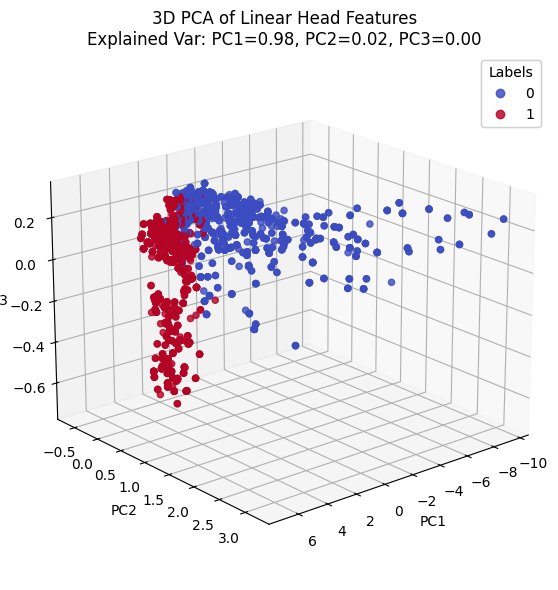

In [1]:
from PCA2 import analyze_pca_only
classifier = analyze_pca_only(
    model_path='spatial_classifier_model',
    data_path='./spatial_classification_dataset.csv' 
)

Extracting linear head features: 100%|██████████| 385/385 [00:05<00:00, 73.68it/s]


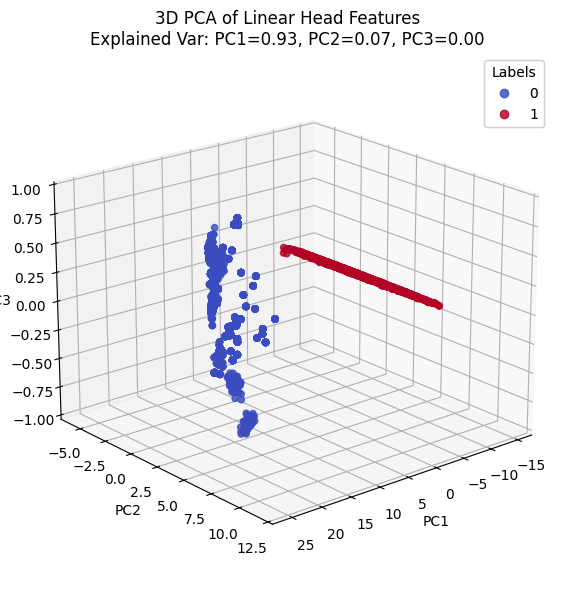

In [2]:
from PCA2 import analyze_pca_only
classifier = analyze_pca_only(
    model_path='spatial_classifier_model',
    data_path='./train_set.csv' 
)

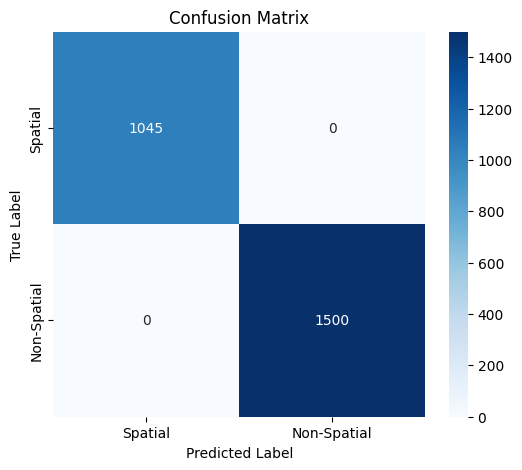

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix
cm = np.array([[1045, 0],
               [0, 1500]])

labels = ['Spatial', 'Non-Spatial']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
